# Problem Statement

**You are working as a data scientist in a global company. Over the years, the company has collected details and gathered a lot of information about individuals. The management wants to build an intelligent system from the data to determine the presence or absence of smoking in a person through bio-signals. Given a person’s information, build a machine learning model that can classify the presence or absence of smoking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv("smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [ ]:
df = df.drop(columns=['ID','oral'])

In [6]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [9]:
print("**************************************************************************")
print(df.shape)
print("**************************************************************************")
print(df.describe())
print("**************************************************************************")
print(df.info())
print("**************************************************************************")

**************************************************************************
(55692, 25)
**************************************************************************
                age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  55692.000000  55692.000000  55692.000000  55692.000000    55692.000000   
mean      44.182917    164.649321     65.864936     82.046418        1.012623   
std       12.071418      9.194597     12.820306      9.274223        0.486873   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     55692.000000   55692.000000

In [10]:
#Checking out the missing values in a dataframe 

df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

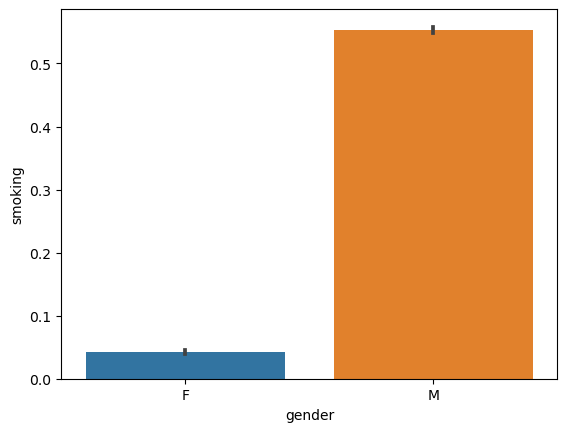

In [11]:
# Data Visualization 
# We can clearly see from the below graph that most smokers are men

sns.barplot(x=df['gender'] , y=df['smoking'])
plt.show()


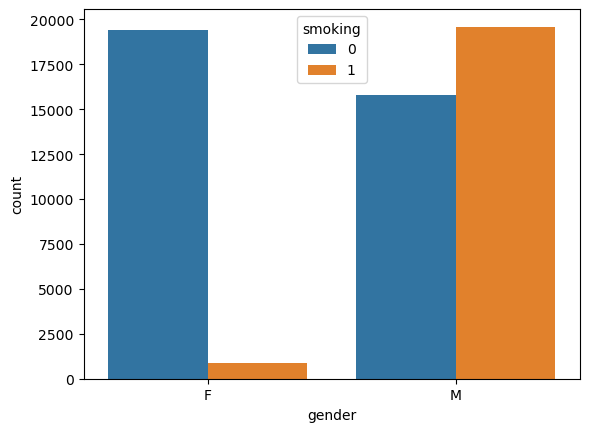

In [12]:
sns.countplot(x=df['gender'] , hue=df['smoking'])
plt.show()

<Axes: ylabel='smoking'>

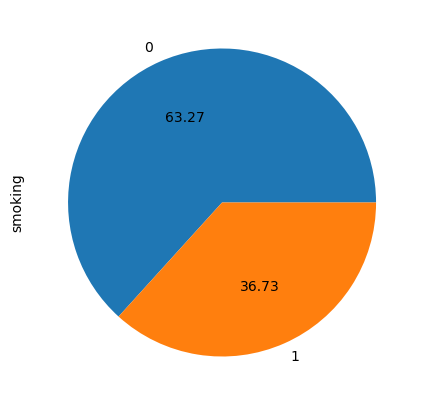

In [14]:
plt.figure(figsize=(10,5))
df['smoking'].value_counts().plot.pie(autopct= '%0.2f')
#There are 36.73 percent of the people who are smoking ciggarette.

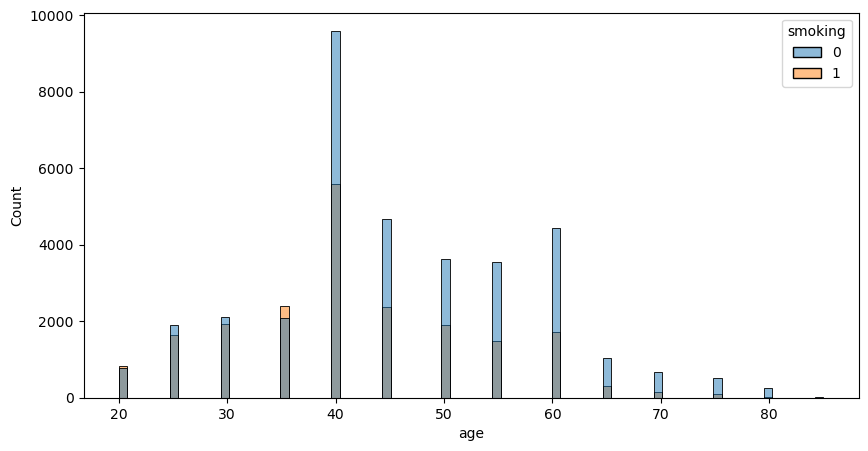

In [15]:
# Most number of smokers are having the age 40

plt.figure(figsize=(10,5))
sns.histplot(x=df['age'] , hue=df['smoking'])
plt.show()

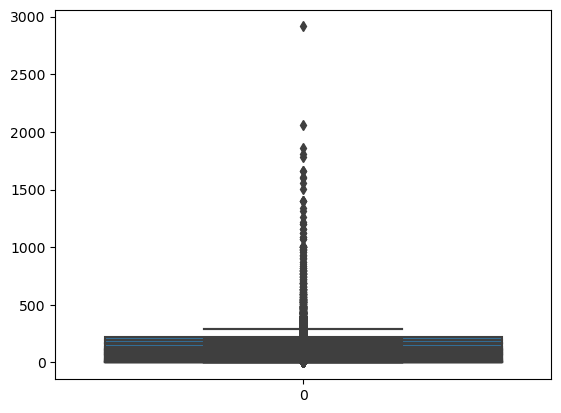

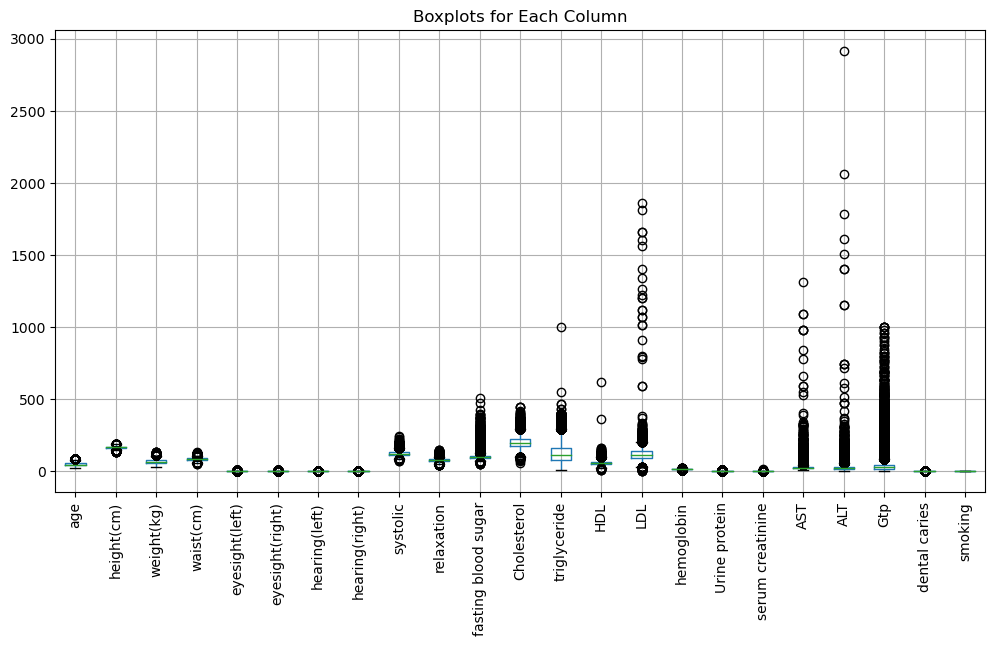

In [30]:
#Representation of columns using boxplot to detect outliers. 
#Here outliers represent natural variations in the population, and they should be left as is in the dataset. 
#These are called true outliers. Therefore for this dataset we will not remove outliers

for i in df.columns:
    if (df[i].dtypes == 'int64' or df[i].dtypes =='float64'):
        sns.boxplot(df[i])
plt.show()


plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplots for Each Column")
plt.xticks(rotation=90)
plt.show()

In [32]:
# Performing One Hot Encoding for  categorical features of a dataframe


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender']= le.fit_transform(df['gender'])
df['tartar']= le.fit_transform(df['tartar'])
df['dental caries']= le.fit_transform(df['dental caries'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int32  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [33]:
# Feature importance is a technique that calculate a score for all the input features for a given model. 
#So out of 24 features we will select the top 15 features based on the score


X=df.iloc[:,:-1]
y=df['smoking']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

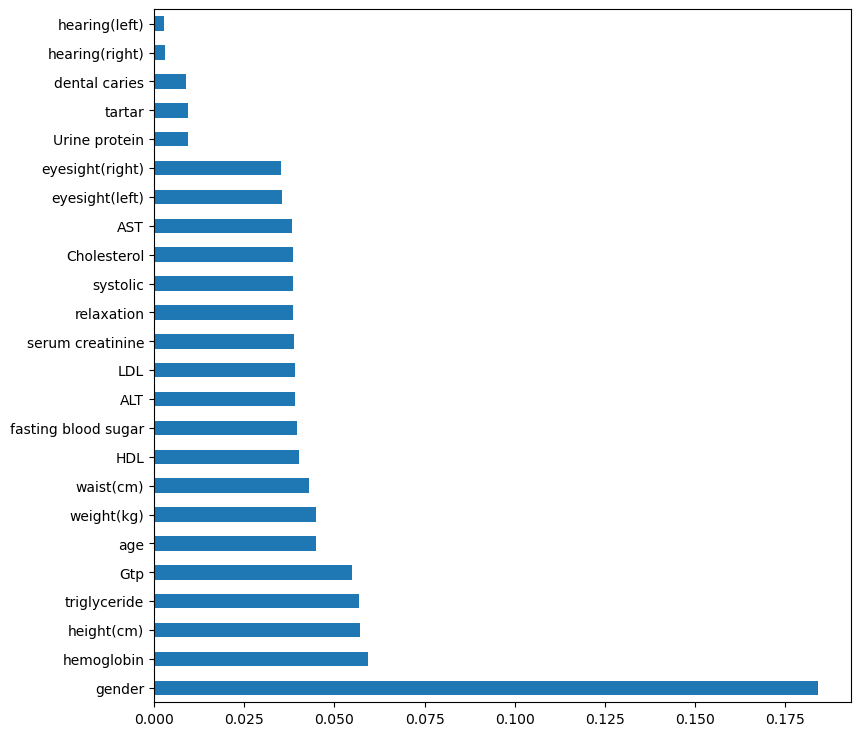

In [35]:
df1=pd.Series(model.feature_importances_,index= X.columns)

plt.figure(figsize=(9,9))
df1.nlargest(24).plot(kind='barh')
plt.show()

In [44]:
# Calculating accuracy and generating the classification report of Logistic Regression


X= df [["gender", "height(cm)", "Gtp", "hemoglobin", "triglyceride","age","weight(kg)", "waist(cm)", "HDL","serum creatinine",

"ALT","fasting blood sugar","relaxation", "LDL","systolic"]]

y=df ["smoking"]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

x_train=sc.fit_transform(x_train)

x_test=sc.transform(x_test)

from sklearn.linear_model import LogisticRegression

sc = StandardScaler()

lr=LogisticRegression ()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report

acc= accuracy_score(y_test,y_pred)
print(acc)
classification_report (y_test,y_pred)

0.7348954125145883


'              precision    recall  f1-score   support\n\n           0       0.81      0.76      0.78      7027\n           1       0.63      0.69      0.66      4112\n\n    accuracy                           0.73     11139\n   macro avg       0.72      0.73      0.72     11139\nweighted avg       0.74      0.73      0.74     11139\n'

In [45]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7027
           1       0.70      0.71      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.78      0.78      0.78     11139



In [46]:
#Bagging Algorithm – Bagging Classifier


#Bootstrap Aggregation or bagging involves taking multiple samples from the training dataset(with replacement)
#and training a model for each sample

from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000)
bagg.fit(x_train,y_train).score(x_test,y_test)

y_pred = bagg.predict(x_test)

print(classification_report(y_test,y_pred))


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.80      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



In [47]:
#Bagging Algorithm – Extra Trees

from sklearn.ensemble import ExtraTreesClassifier
et= ExtraTreesClassifier(n_estimators=1000,random_state=2)
et.fit(x_train,y_train)

y_pred = et.predict(x_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7027
           1       0.75      0.82      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139



In [48]:
#Bagging Algorithm – Random Forest


from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=1000)
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.76      0.80      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139

